In [1]:
#loading libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(digest)
library(reshape2)
library(ggplot2)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
set.seed(1)

# reading the dataset from online UCI Machine Learning Repository

temp <- tempfile()
download.file("http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip", temp)
data <- read_csv2(unz(temp, "student-mat.csv"))
unlink(temp)

head(data)


Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [3]:
set.seed(1)

# Looking at the variables we have
# Seems like the dataset from above is already in Tidy Format! However, 
# some of these variables classified as characters  
glimpse(data)

Rows: 395
Columns: 33
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP"…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F"…
$ age        <dbl> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15…
$ address    <chr> "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U"…
$ famsize    <chr> "GT3", "GT3", "LE3", "GT3", "GT3", "LE3", "LE3", "GT3", "L…
$ Pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T"…
$ Medu       <dbl> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4…
$ Fedu       <dbl> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3…
$ Mjob       <chr> "at_home", "at_home", "at_home", "health", "other", "servi…
$ Fjob       <chr> "teacher", "other", "other", "services", "other", "other",…
$ reason     <chr> "course", "course", "other", "home", "home", "reputation",…
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother"…
$ traveltime <dbl> 2, 1, 1, 1,

In [4]:
set.seed(1)

# Turn discrete variables into factors instead of characters
data <- data %>%
    mutate(across(school:sex, as.factor)) %>%
    mutate(across(address:health, as.factor)) 
glimpse(data)

Rows: 395
Columns: 33
$ school     <fct> GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP…
$ sex        <fct> F, F, F, F, F, M, M, F, M, M, F, F, M, M, M, F, F, F, M, M…
$ age        <dbl> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15…
$ address    <fct> U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U…
$ famsize    <fct> GT3, GT3, LE3, GT3, GT3, LE3, LE3, GT3, LE3, GT3, GT3, GT3…
$ Pstatus    <fct> A, T, T, T, T, T, T, A, A, T, T, T, T, T, A, T, T, T, T, T…
$ Medu       <fct> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4…
$ Fedu       <fct> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3…
$ Mjob       <fct> at_home, at_home, at_home, health, other, services, other,…
$ Fjob       <fct> teacher, other, other, services, other, other, other, teac…
$ reason     <fct> course, course, other, home, home, reputation, home, home,…
$ guardian   <fct> mother, father, mother, mother, father, mother, mother, mo…
$ traveltime <fct> 2, 1, 1, 1,

In [5]:
set.seed(1)

#splitting 75% into training set and 25% into testing set
student_split <- initial_split(data, prop = 3/4, strata = G3)  
student_train <- training(student_split)   
student_test <- testing(student_split)

In [6]:
set.seed(1)

# See if there are NA's in the training set
# There are no NA's in the training set! 
sum(is.na(student_train))

[1] 0

### Summarizing Data

In [7]:
set.seed(1)

# Looking at summary statistics for training set
summary(student_train)

 school   sex          age        address famsize   Pstatus Medu    Fedu  
 GP:266   F:147   Min.   :15.00   R: 67   GT3:208   A: 32   0:  2   0: 0  
 MS: 32   M:151   1st Qu.:16.00   U:231   LE3: 90   T:266   1: 45   1:63  
                  Median :17.00                             2: 75   2:81  
                  Mean   :16.68                             3: 73   3:79  
                  3rd Qu.:18.00                             4:103   4:75  
                  Max.   :22.00                                           
       Mjob          Fjob            reason      guardian   traveltime
 at_home :43   at_home : 14   course    :110   father: 61   1:194     
 health  :28   health  : 15   home      : 79   mother:215   2: 79     
 other   :99   other   :166   other     : 24   other : 22   3: 19     
 services:78   services: 84   reputation: 85                4:  6     
 teacher :50   teacher : 19                                           
                                                 

### Visualizing Data

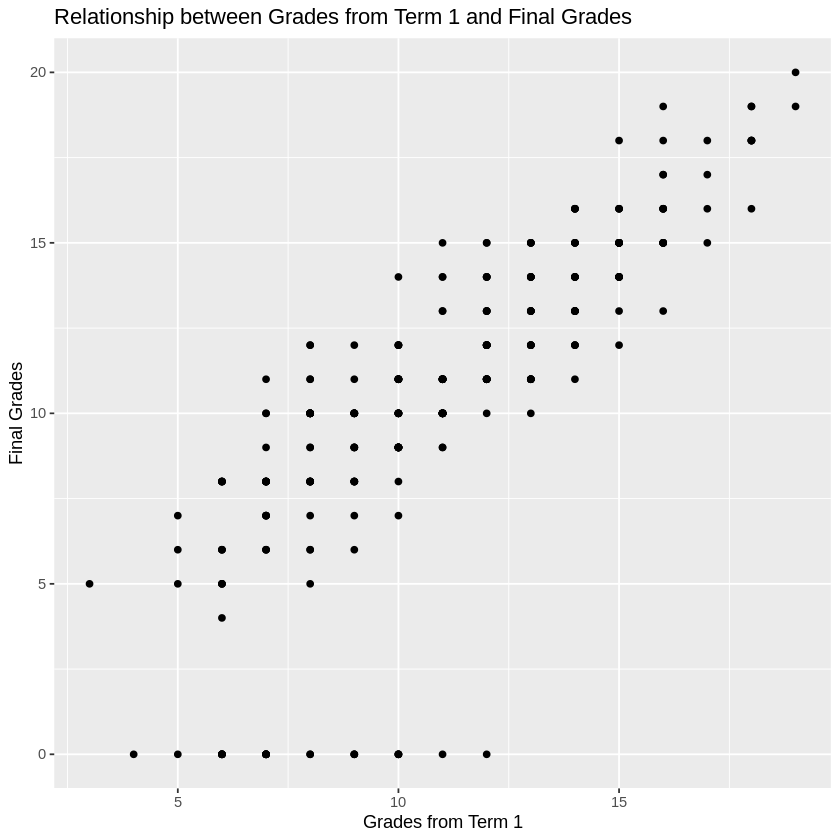

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



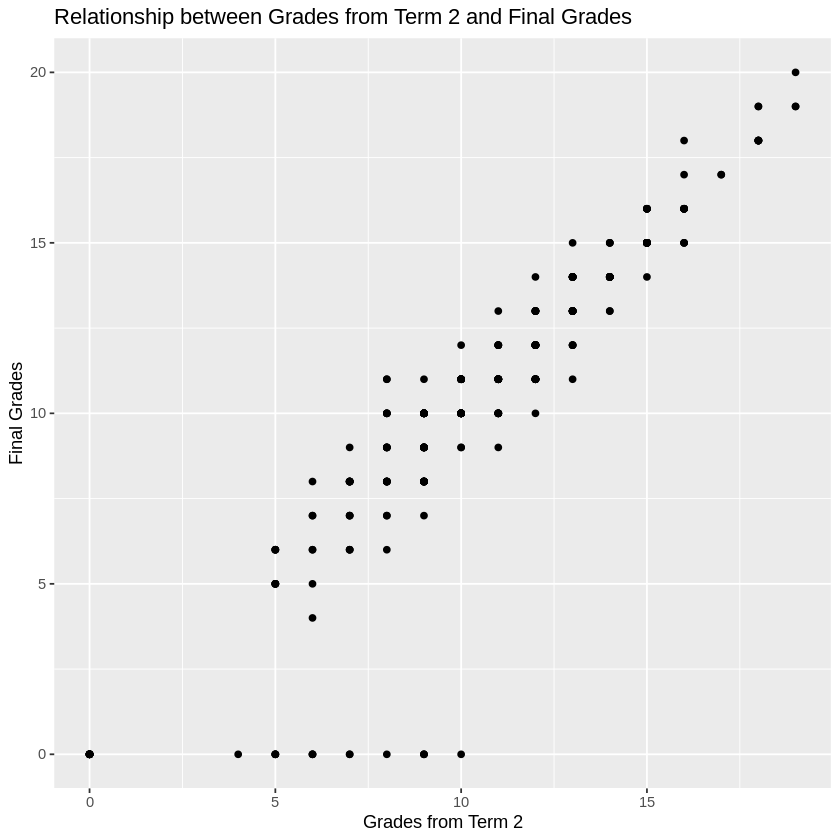

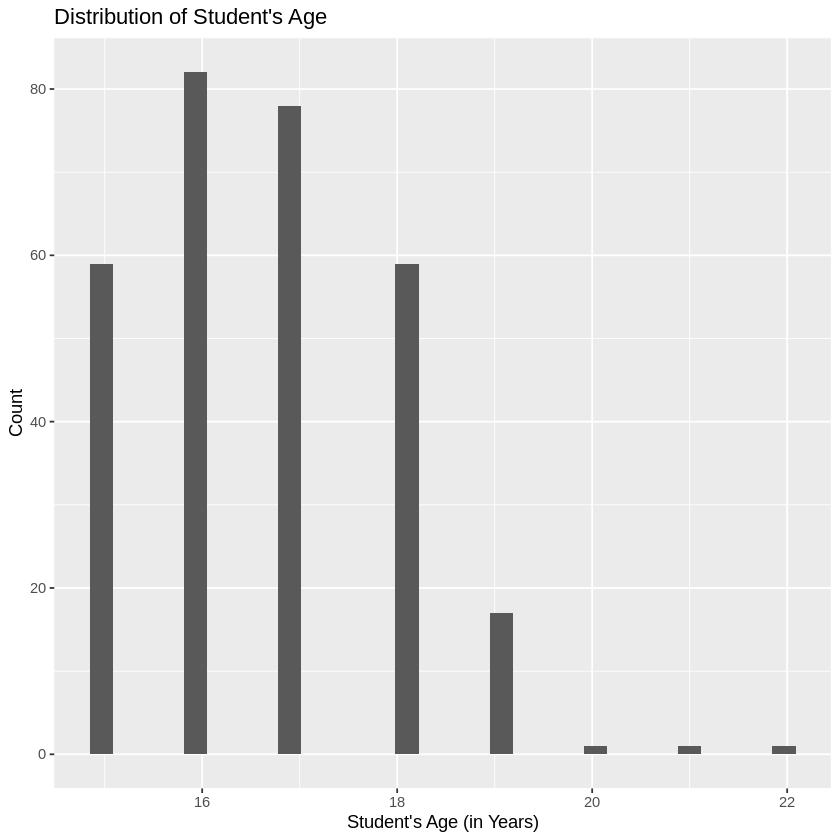

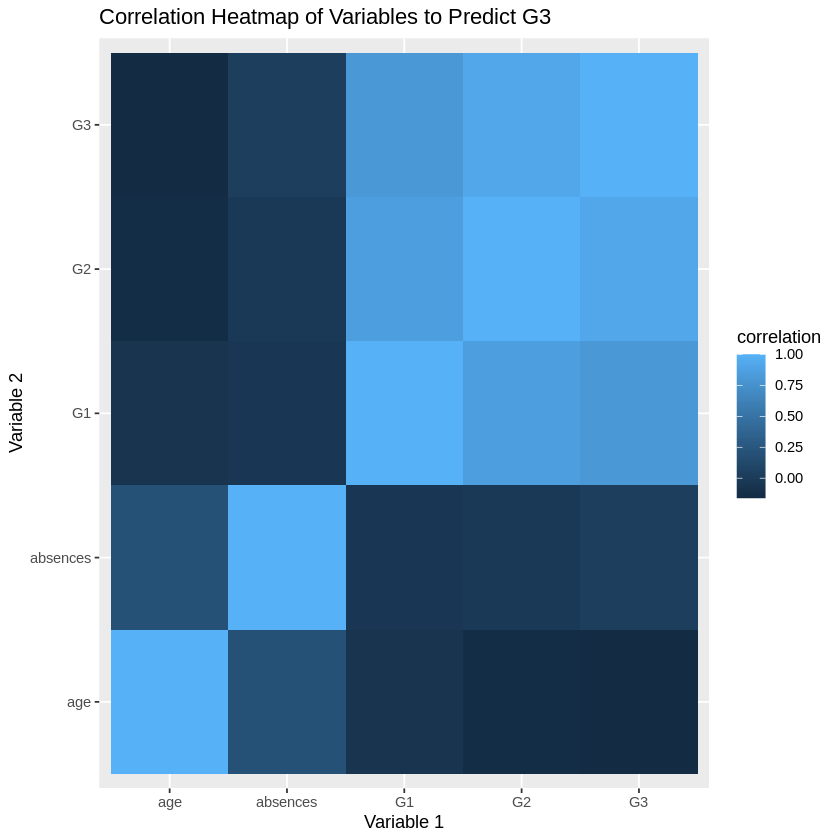

In [8]:
set.seed(1)


# Visualizing 2 plots with variables that we think will impact final grades, 1 plot about distribution of a variable, and 1 plot about correlation heatmap
G1_G3_plot <- student_train %>%
    ggplot(aes(x = G1, y= G3)) +
    geom_point() +
    labs(x = "Grades from Term 1", y = "Final Grades") + 
    ggtitle("Relationship between Grades from Term 1 and Final Grades")

G2_G3_plot <- student_train %>%
    ggplot(aes(x = G2, y= G3)) +
    geom_point() +
    labs(x = "Grades from Term 2", y = "Final Grades") + 
    ggtitle("Relationship between Grades from Term 2 and Final Grades")

age_plot <- student_train %>%
    ggplot(aes(x = age)) +
    geom_histogram() +
    labs(x = "Student's Age (in Years)", y = "Count") + 
    ggtitle("Distribution of Student's Age")

student_train_select <- student_train %>%
    select(age, absences, G1, G2, G3)



cormat <- round(cor(student_train_select),2)
melted_cormat <- melt(cormat)
corr_plot <- ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
    geom_tile() +
    ggtitle("Correlation Heatmap of Variables to Predict G3") +
    labs(x = "Variable 1", y = "Variable 2", fill = "correlation")

G1_G3_plot
G2_G3_plot
age_plot
corr_plot

### ^^From this correlation graph above, we can see that G1 (grades from term 1) and G2 (grades from term 2) are correlated to final grade. Absences is also slightly correlated.




In [9]:
set.seed(1)


# Building a linear regression model specification
lm_spec <- linear_reg() %>% 
set_engine("lm") %>%
set_mode("regression") 

lm_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


In [10]:
set.seed(1)

# Creating a recipe to predict G3 with G1, G2 and absences using the training dataset.
# Establishing a workflow analysis with the model specification and recipe and fitting our training dataset to the linear regression model.

lm_recipe <- recipe(G3 ~ G1 + G2 + absences, data = student_train)

lm_fit <- workflow() %>%
            add_recipe(lm_recipe) %>%
            add_model(lm_spec) %>%
            fit(data = student_train)
lm_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)           G1           G2     absences  
   -1.41861      0.09610      1.00011      0.03007  


In [11]:
set.seed(1)

# Calculating the RMSPE using the test data
lm_test_results <- lm_fit %>%
                    predict(student_test) %>%
                    bind_cols(student_test) %>%
                    metrics(truth = G3, estimate = .pred)

lm_rmspe <- lm_test_results %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()
lm_rmspe

[1] 2.411621

In [12]:
set.seed(1)

lm_recipe_1 <- recipe(G3 ~ G1 + G2, data = student_train)

lm_fit_1 <- workflow() %>%
            add_recipe(lm_recipe_1) %>%
            add_model(lm_spec) %>%
            fit(data = student_train)
lm_fit_1

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)           G1           G2  
   -1.20571      0.09018      1.00316  


In [13]:
set.seed(1)

# Calculating the RMSPE using the test data
lm_test_results_1 <- lm_fit_1 %>%
                    predict(student_test) %>%
                    bind_cols(student_test) %>%
                    metrics(truth = G3, estimate = .pred)

lm_rmspe_1 <- lm_test_results_1 %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()
lm_rmspe_1

[1] 2.448029

In [14]:
set.seed(1)

# Creating a recipe using final grades of the students(G3) and Term 1 grades of the students(G1) as variables of interest using the training dataset.
# Establishing a workflow analysis with the model specification and recipe and fitting our training dataset to the linear regression model.

lm_recipe_2 <- recipe(G3 ~ G1, data = student_train)

lm_fit_2 <- workflow() %>%
            add_recipe(lm_recipe_2) %>%
            add_model(lm_spec) %>%
            fit(data = student_train)
lm_fit_2

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)           G1  
     -1.479        1.089  


`geom_smooth()` using formula 'y ~ x'



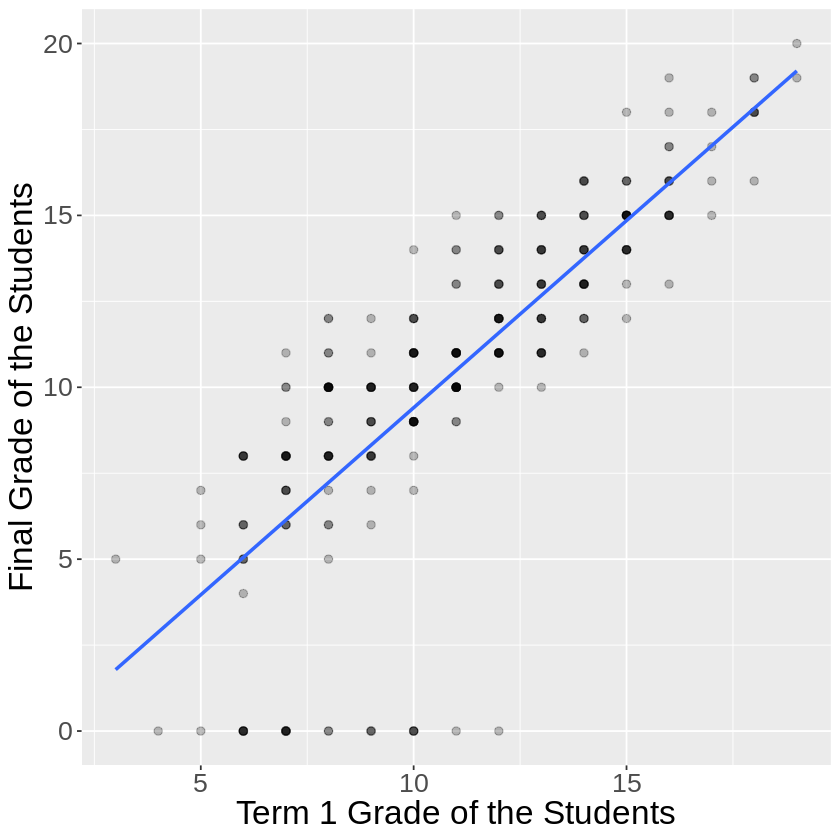

In [15]:
set.seed(1)

# Visualizing the model predictions as a straight line overlaid on the training data
lm_predictions_2 <- student_train %>%
    ggplot(aes(x = G1, y = G3)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(method = "lm", se = FALSE) +
        xlab("Term 1 Grade of the Students") +
        ylab("Final Grade of the Students") +
        theme(text = element_text(size = 20))

lm_predictions_2

In [16]:
set.seed(1)

# Calculating the RMSPE using the test data
lm_test_results_2 <- lm_fit_2 %>%
                    predict(student_test) %>%
                    bind_cols(student_test) %>%
                    metrics(truth = G3, estimate = .pred)

lm_rmspe_2 <- lm_test_results_2 %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()
lm_rmspe_2

[1] 2.924855

`geom_smooth()` using formula 'y ~ x'



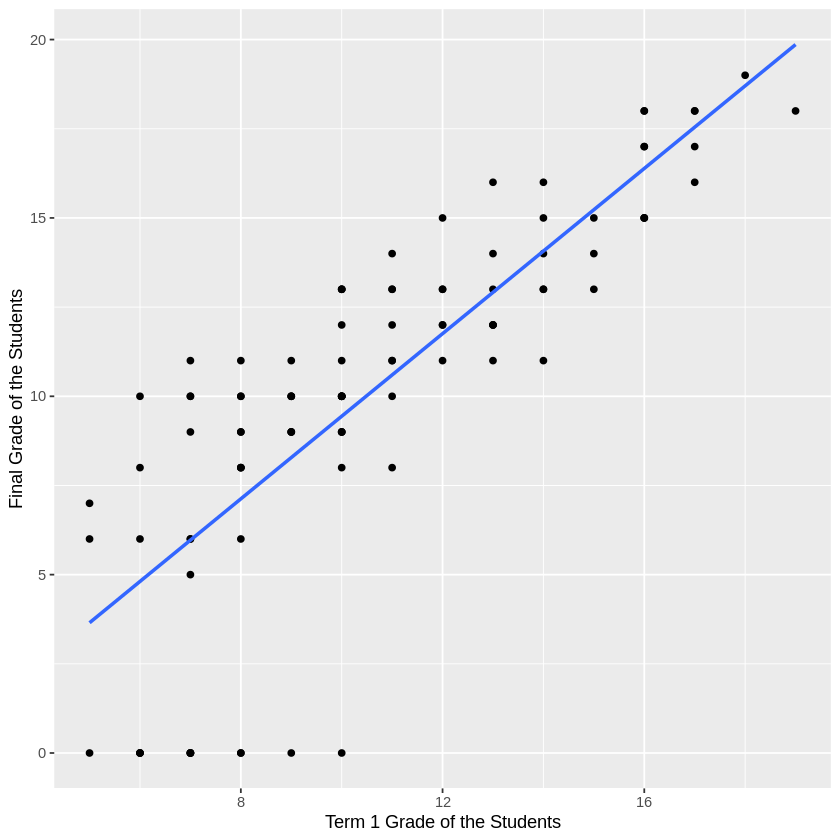

In [17]:
set.seed(1)

# Visualizing the model predictions as a straight line overlaid on the test data
lm_predictions_test_2 <- student_test %>%
ggplot(aes(x=G1, y=G3)) +
geom_point()+
labs(x="Term 1 Grade of the Students", y="Final Grade of the Students")+
geom_smooth(method = "lm", se= FALSE)

lm_predictions_test_2

In [18]:
set.seed(1)

# Creating a recipe using final grades of the students(G3) and Term 2 grades of the students(G2) as variables of interest using the training dataset.
# Establishing a workflow analysis with the model specification and recipe and fitting our training dataset to the linear regression model.

lm_recipe_3 <- recipe(G3 ~ G2, data = student_train)

lm_fit_3 <- workflow() %>%
            add_recipe(lm_recipe_3) %>%
            add_model(lm_spec) %>%
            fit(data = student_train)
lm_fit_3

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)           G2  
    -0.9127       1.0686  


`geom_smooth()` using formula 'y ~ x'



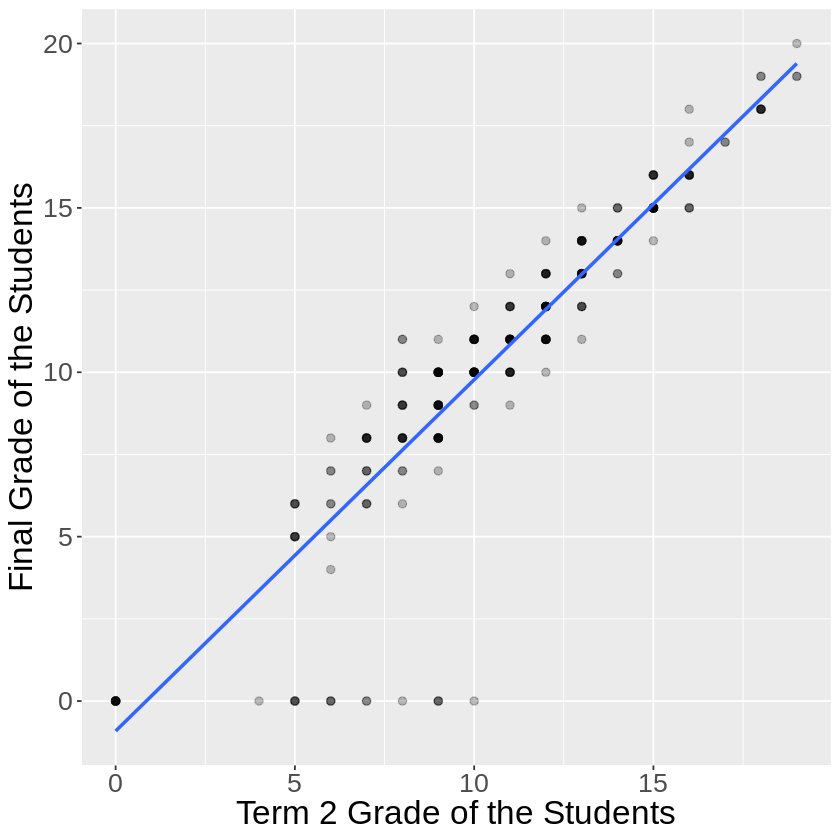

In [19]:
set.seed(1)

# Visualizing the model predictions as a straight line overlaid on the training data
lm_predictions_3 <- student_train %>%
    ggplot(aes(x = G2, y = G3)) +
        geom_point(alpha = 0.25, size = 2) +
        geom_smooth(method = "lm", se = FALSE) +
        xlab("Term 2 Grade of the Students") +
        ylab("Final Grade of the Students") +
        theme(text = element_text(size = 20))

lm_predictions_3

In [20]:
set.seed(1)

lm_test_results_3 <- lm_fit_3 %>%
                    predict(student_test) %>%
                    bind_cols(student_test) %>%
                    metrics(truth = G3, estimate = .pred)

lm_rmspe_3 <- lm_test_results_3 %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()
lm_rmspe_3

[1] 2.485201

# K-nearest neighbors regression

In [21]:
set.seed(1)

# Taking a subset of size 30 students from our data
small_student <- slice_sample(data, n = 30)
small_student

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,17,U,GT3,T,3,1,services,services,⋯,3,4,3,2,3,5,1,12,14,15
GP,M,16,U,GT3,T,2,2,other,other,⋯,4,3,5,2,4,4,4,10,10,10
GP,M,18,R,GT3,T,2,2,services,other,⋯,3,3,3,1,2,4,0,7,4,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GP,M,15,U,LE3,T,4,4,teacher,other,⋯,5,4,3,2,4,5,8,12,12,12
GP,M,15,U,LE3,A,4,4,teacher,teacher,⋯,5,5,3,1,1,4,6,18,19,19
GP,M,16,U,LE3,T,4,3,health,other,⋯,3,1,3,1,3,5,4,8,10,10


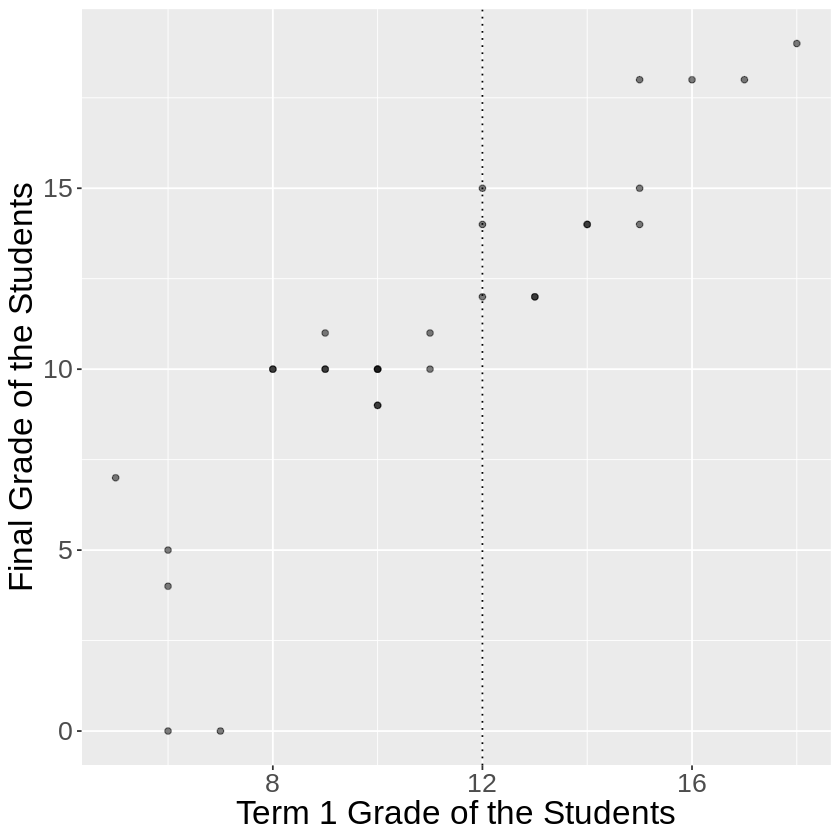

In [22]:
set.seed(1)

# Plotting a scatterplot to assess the relationship between Final Grade and Term 1 Grade of students
small_plot <- small_student %>%
    ggplot(aes(x = G1, y = G3)) +
    geom_point(alpha = 0.5) +
    labs(x="Term 1 Grade of the Students", y="Final Grade of the Students") +
    theme(text = element_text(size = 20)) +
 geom_vline(xintercept = 12, linetype = "dotted")
small_plot

In [23]:
set.seed(1)

# Finding and labeling the 5 nearest neighbors to our observation of Term 1 grade as 12 and predicting the final grades based on this
prediction  <- small_student %>% 
 mutate(diff = abs(12 - G1)) %>% 
 arrange(diff) %>% 
 slice(1:5) %>%  
 summarise(predicted = mean(G3)) %>%
 pull()

prediction 

[1] 12.8

In [24]:
set.seed(1)

# Creating a recipe for preprocessing our data, 
# Creating a model specification for K-nearest neighbors regression;
# creating a 5-fold cross validation object, and putting the recipe and model specification together in a workflow.

student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                 set_engine("kknn") %>%
                 set_mode("regression")

student_recipe <- recipe(G3 ~ G1, data = student_train) %>%
                   step_scale(all_predictors()) %>%
                   step_center(all_predictors())

student_vfold <- vfold_cv(student_train, v = 5, strata = G3)

student_wkflw <- workflow() %>%
  add_recipe(student_recipe) %>%
  add_model(student_spec)

student_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [25]:
set.seed(1)

# Running cross validation for a grid of numbers of neighbors ranging from 1 to 200
gridvals <- tibble(neighbors = seq(1, 200))

student_results <- student_wkflw %>%
                        tune_grid(resamples = student_vfold, grid = gridvals) %>%
                        collect_metrics()
student_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,3.7400089,5,0.32078023,Model001
1,rsq,standard,0.4557639,5,0.06070715,Model001
2,rmse,standard,3.1568669,5,0.25588183,Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
199,rsq,standard,0.5503665,5,0.01322816,Model199
200,rmse,standard,3.8133958,5,0.20603731,Model200
200,rsq,standard,0.5487971,5,0.01426037,Model200


In [26]:
set.seed(1)

# Finding the minimum RMSPE and along with it's associated metrics such as the mean and standard error, to help us find the number of neighbors that will serve as our best  k  value.
student_min <- student_results %>%
    filter(.metric == "rmse") %>%
    arrange(mean)  %>% 
    slice(1)
student_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
25,rmse,standard,2.709451,5,0.2075702,Model025


This shows that the smallest RMSPE occurs when K=25

In [27]:
set.seed(1)


k_min <- student_min %>%
            pull(neighbors)

student_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
                            set_engine("kknn") %>%
                            set_mode("regression")

student_best_fit <- workflow() %>%
                        add_recipe(student_recipe) %>%
                        add_model(student_best_spec) %>%
                        fit(data = student_train)

student_summary <- student_best_fit %>% 
                       predict(student_test) %>%
                       bind_cols(student_test) %>%
                       metrics(truth = G3, estimate = .pred) %>%
                       filter(.metric == 'rmse')
student_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.937462


We expect the error in our RMSPE to be roughly 2.937462, which is almost similar to our cross-validation RMSPE estimate of our tuned model(which was 2.709451).

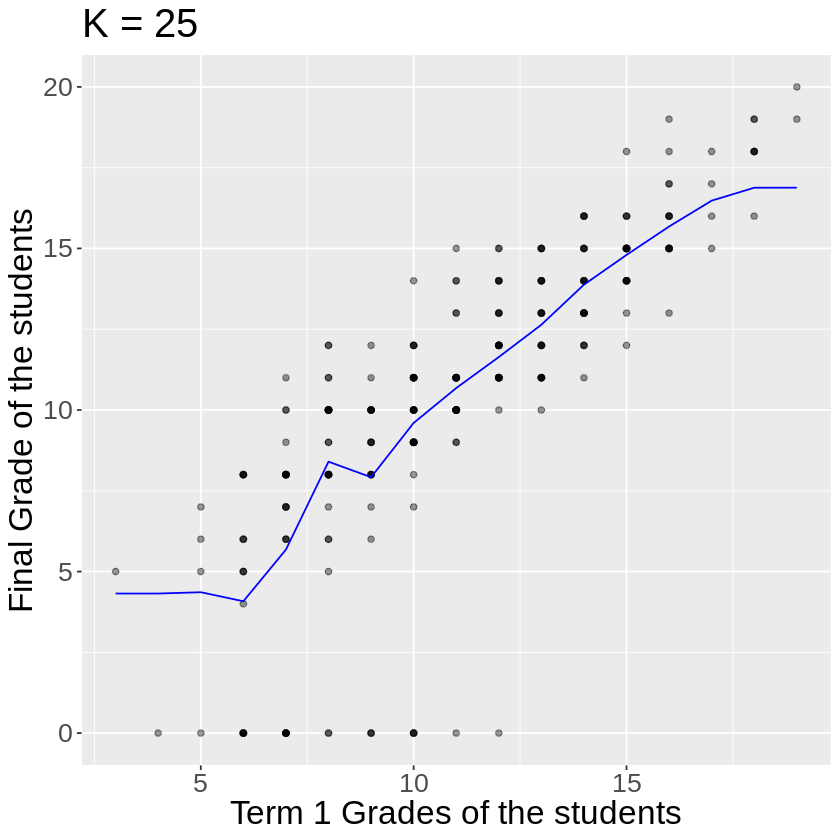

In [28]:
set.seed(1)

# Visualizing the relationship between G1 and G3 with our best k value to ultimately explore how the k  value affects k-nn regression.


options(repr.plot.width = 7, repr.plot.height = 7)

student_preds <- student_best_fit %>%
                predict(student_train) %>%
                bind_cols(student_train)

student_plot <- ggplot(student_preds, aes(x = G1, y = G3)) +
            geom_point(alpha = 0.4) +
            xlab("Term 1 Grades of the students") +
            ylab("Final Grade of the students") + 
            geom_line(data = student_preds, aes(x = G1, y = .pred), color = "blue") +
            ggtitle(paste0("K = ", k_min)) +
            theme(text = element_text(size = 20))
student_plot

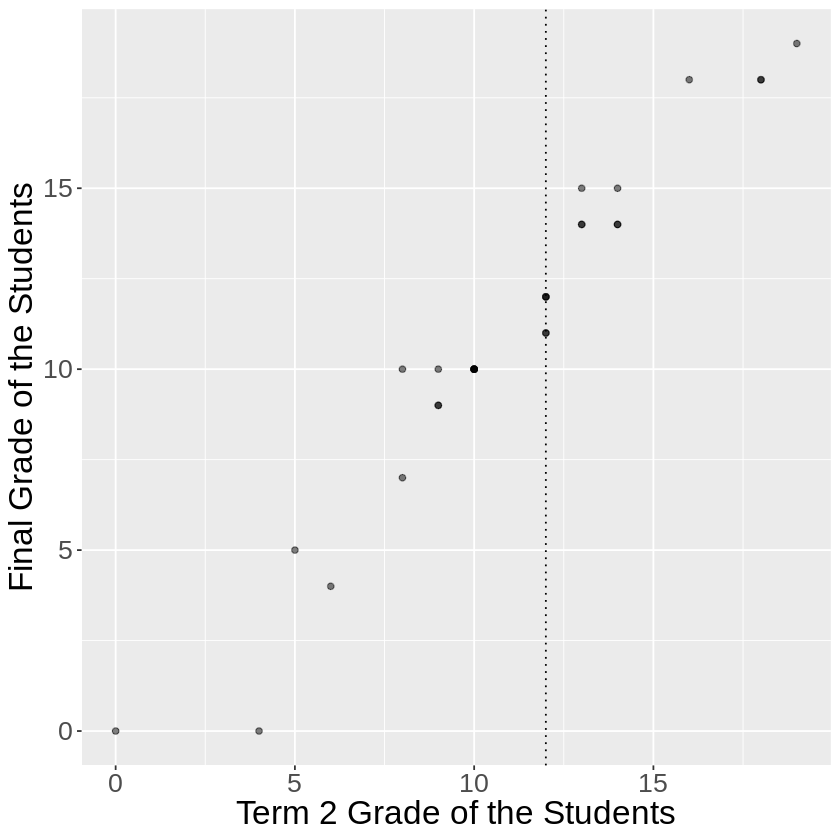

In [29]:
set.seed(1)

# Plotting a scatterplot to assess the relationship between Final Grade and Term 2 Grade of students
small_plot_1 <- small_student %>%
    ggplot(aes(x = G2, y = G3)) +
    geom_point(alpha = 0.5) +
    labs(x="Term 2 Grade of the Students", y="Final Grade of the Students") +
    theme(text = element_text(size = 20)) +
 geom_vline(xintercept = 12, linetype = "dotted")
small_plot_1

In [30]:
set.seed(1)

# Finding and labeling the 5 nearest neighbors to our observation of Term 2 grade as 12 and predicting the final grades based on this
prediction_1  <- small_student %>% 
 mutate(diff = abs(12 - G2)) %>% 
 arrange(diff) %>% 
 slice(1:5) %>%  
 summarise(predicted = mean(G3)) %>%
 pull()

prediction_1

[1] 11.6

In [31]:
set.seed(1)

# Creating a model specification for K-nearest neighbors regression;
# Creating a recipe for preprocessing our data, 
# creating a 5-fold cross validation object, and putting the recipe and model specification together in a workflow.

student_spec_1 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                 set_engine("kknn") %>%
                 set_mode("regression")


student_recipe_1 <- recipe(G3 ~ G2, data = student_train) %>%
                   step_scale(all_predictors()) %>%
                   step_center(all_predictors())

student_vfold <- vfold_cv(student_train, v = 5, strata = G3)

student_wkflw_1 <- workflow() %>%
  add_recipe(student_recipe_1) %>%
  add_model(student_spec_1)

student_wkflw_1

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [32]:
set.seed(1)

# Running cross validation for a grid of numbers of neighbors ranging from 1 to 200
gridvals <- tibble(neighbors = seq(1, 200))

student_results_1 <- student_wkflw_1 %>%
                        tune_grid(resamples = student_vfold, grid = gridvals) %>%
                        collect_metrics()
student_results_1

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2.0179753,5,0.23475885,Model001
1,rsq,standard,0.8026323,5,0.03158091,Model001
2,rmse,standard,1.8986064,5,0.22435939,Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
199,rsq,standard,0.7437853,5,0.02040662,Model199
200,rmse,standard,3.7087676,5,0.20196426,Model200
200,rsq,standard,0.7430788,5,0.01992987,Model200


In [33]:
set.seed(1)

# Finding the minimum RMSPE and along with it's associated metrics such as the mean and standard error, to help us find the number of neighbors that will serve as our best  k  value.
student_min_1 <- student_results_1 %>%
    filter(.metric == "rmse") %>%
    arrange(mean)  %>% 
    slice(1)
student_min_1

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,rmse,standard,1.752561,5,0.2210295,Model011


This shows that the smallest RMSPE occurs when K=11.

In [34]:
set.seed(1)


k_min_1 <- student_min_1 %>%
            pull(neighbors)

student_best_spec_1 <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_1) %>%
                            set_engine("kknn") %>%
                            set_mode("regression")

student_best_fit_1 <- workflow() %>%
                        add_recipe(student_recipe_1) %>%
                        add_model(student_best_spec_1) %>%
                        fit(data = student_train)

student_summary_1 <- student_best_fit_1 %>% 
                       predict(student_test) %>%
                       bind_cols(student_test) %>%
                       metrics(truth = G3, estimate = .pred) %>%
                       filter(.metric == 'rmse')
student_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.937462


We expect the error in our RMSPE to be roughly 2.937462, which is not very similar to our cross-validation RMSPE estimate of our tuned model(which was 1.752561).

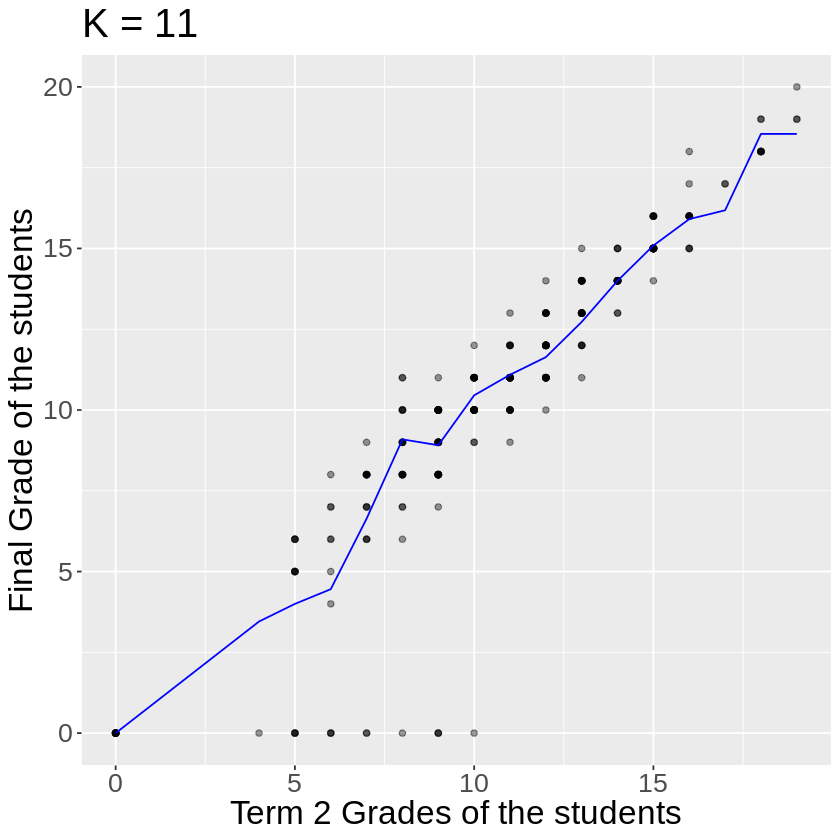

In [35]:
set.seed(1)

# Visualizing the relationship between G2 and G3 with our best k value to ultimately explore how the k  value affects k-nn regression.


options(repr.plot.width = 7, repr.plot.height = 7)

student_preds_1 <- student_best_fit_1 %>%
                predict(student_train) %>%
                bind_cols(student_train)

student_plot_1 <- ggplot(student_preds_1, aes(x = G2, y = G3)) +
            geom_point(alpha = 0.4) +
            xlab("Term 2 Grades of the students") +
            ylab("Final Grade of the students") + 
            geom_line(data = student_preds_1, aes(x = G2, y = .pred), color = "blue") +
            ggtitle(paste0("K = ", k_min_1)) +
            theme(text = element_text(size = 20))
student_plot_1

# Multivariable KNN regression

In [36]:
set.seed(1)

student_recipe_2 <- recipe(G3 ~ G1 + G2, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

student_spec_2 <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

gridvals <- tibble(neighbors = seq(1, 200))

student_multi_2 <- workflow() %>%
  add_recipe(student_recipe_2) %>%
  add_model(student_spec) %>%
  tune_grid(student_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean))

student_k_2 <- student_multi_2 %>%
              pull(neighbors)

student_multi_2

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,rmse,standard,1.807127,5,0.1825799,Model005


In [37]:
set.seed(1)


student_spec_2 <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = student_k_2) %>%
  set_engine("kknn") %>%
  set_mode("regression")

knn_mult_fit_2 <- workflow() %>%
  add_recipe(student_recipe_2) %>%
  add_model(student_spec_2) %>%
  fit(data = student_train)

knn_mult_preds_2 <- knn_mult_fit_2 %>%
  predict(student_test) %>%
  bind_cols(student_test)

knn_mult_mets_2 <- metrics(knn_mult_preds_2, truth = G3, estimate = .pred) %>%
                     filter(.metric == 'rmse')
knn_mult_mets_2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.724762


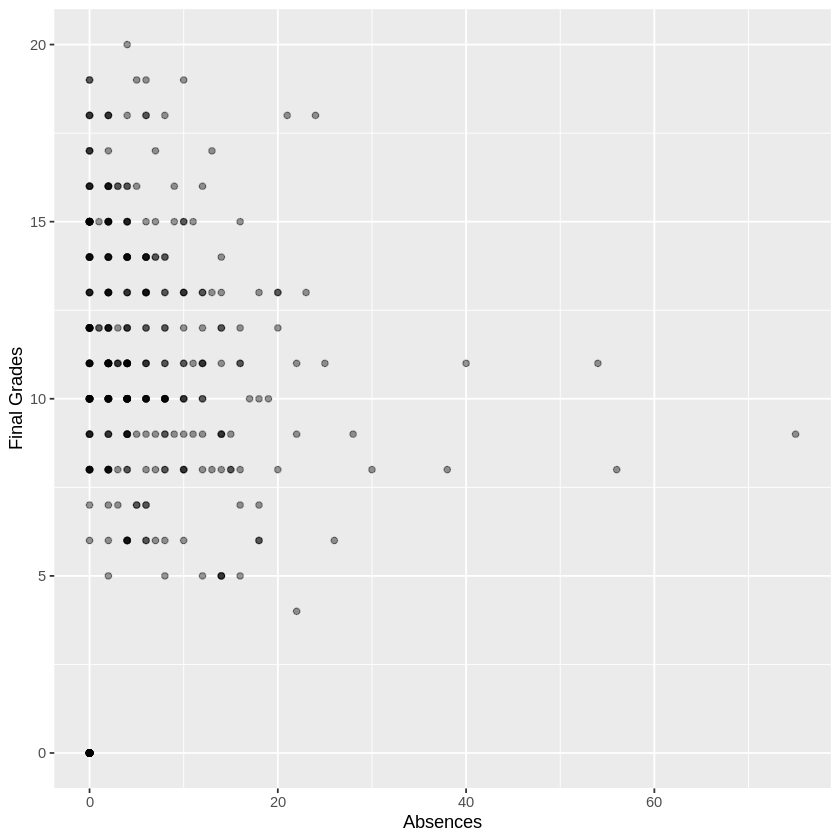

In [38]:
set.seed(1)


plot_absences <- data %>%
             ggplot(aes(x = absences, y = G3)) +
             geom_point(alpha = 0.4) +
             labs(x = 'Absences', y = 'Final Grades')
plot_absences

In [41]:
set.seed(1)


student_recipe_3 <- recipe(G3 ~ G1 + G2 + absences, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

student_spec_3 <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

gridvals <- tibble(neighbors = seq(1, 200))

student_multi_3 <- workflow() %>%
  add_recipe(student_recipe_3) %>%
  add_model(student_spec) %>%
  tune_grid(student_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean))

student_k_3 <- student_multi_3 %>%
              pull(neighbors)

student_multi_3

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8,rmse,standard,1.446857,5,0.126676,Model008


In [42]:
set.seed(1)


student_spec_3 <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = student_k_3) %>%
  set_engine("kknn") %>%
  set_mode("regression")

knn_mult_fit_3 <- workflow() %>%
  add_recipe(student_recipe_3) %>%
  add_model(student_spec_3) %>%
  fit(data = student_train)

knn_mult_preds_3 <- knn_mult_fit_3 %>%
  predict(student_test) %>%
  bind_cols(student_test)

knn_mult_mets_3 <- metrics(knn_mult_preds_3, truth = G3, estimate = .pred) %>%
                     filter(.metric == 'rmse')
knn_mult_mets_3

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.402479
